# Exploratory Data Analysis(EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/Twitter_Data.csv'

# Load the CSV dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head(5))


First five rows of the dataset:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


# Data Visualization

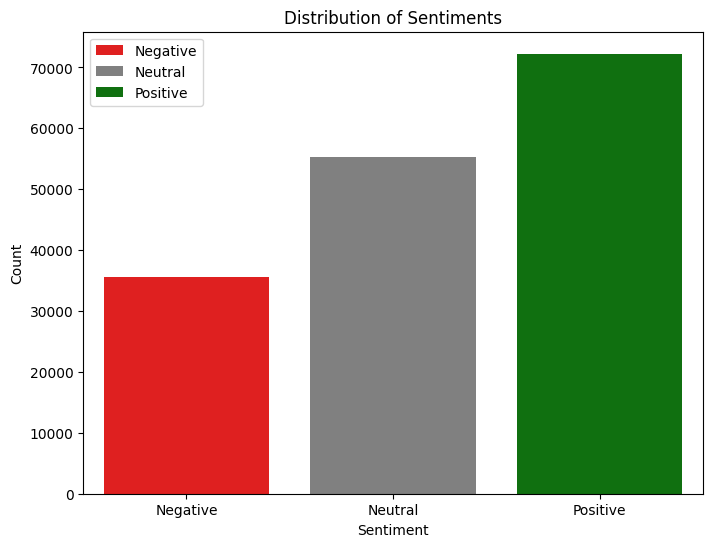

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette with green for positive sentiment
custom_palette = ['red', 'gray', 'green']

plt.figure(figsize=(8, 6))
sns.countplot(x='category', hue='category', data=df, palette=custom_palette, legend=False)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])

# Add legend with respective colors and labels
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper left')

plt.show()


**Plotting the Pie chart of the percentage of different sentiments of all the tweets**

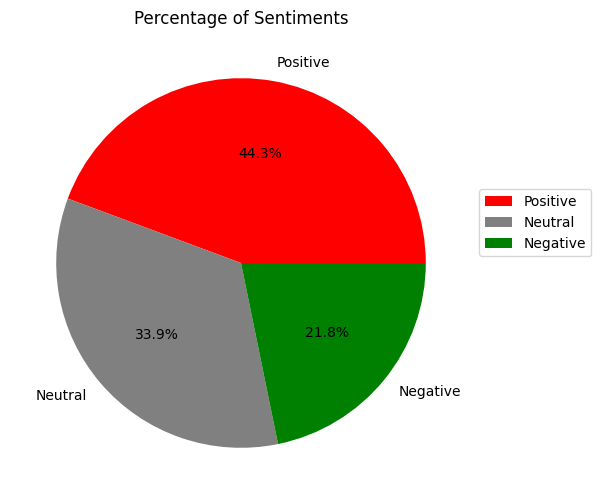

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of each sentiment category
sentiment_counts = df['category'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'gray', 'green'])
plt.title('Percentage of Sentiments')
plt.legend(sentiment_counts.index, loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()


**Visualizing data into wordclouds**

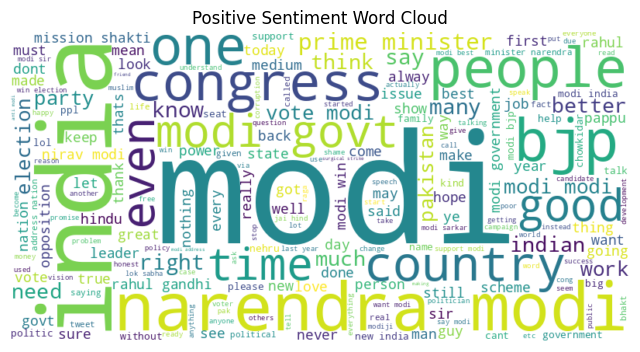

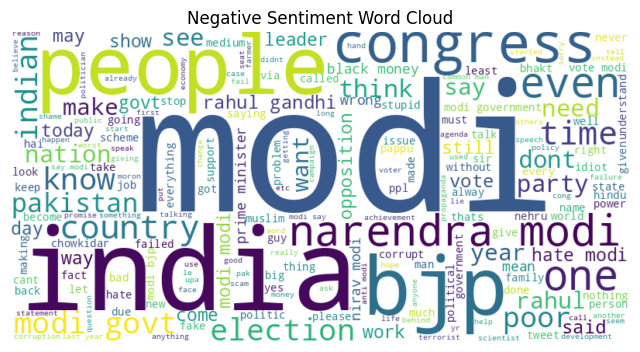

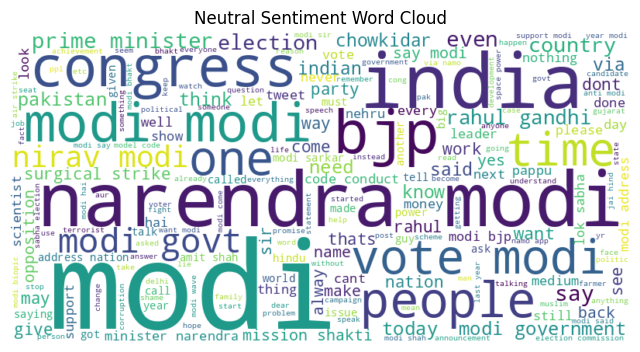

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataset based on sentiment categories
positive_tweets = df[df['category'] == 1]['cleaned_text(preprocessed)'].values
negative_tweets = df[df['category'] == -1]['cleaned_text(preprocessed)'].values
neutral_tweets = df[df['category'] == 0]['cleaned_text(preprocessed)'].values

# Concatenate preprocessed tweets for each sentiment category
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)
neutral_text = ' '.join(neutral_tweets)

# Generate word clouds if there are words present
if positive_text:
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

if negative_text:
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

if neutral_text:
    neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(neutral_wordcloud, interpolation='bilinear')
    plt.title('Neutral Sentiment Word Cloud')
    plt.axis('off')
    plt.show()


# Data Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the CSV dataset into a pandas DataFrame
file_path = '/content/Twitter_Data.csv'
df = pd.read_csv(file_path)

# Handle missing values: Drop rows with missing values
df.dropna(inplace=True)

# Text cleaning
def Clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, punctuation, or symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization: Split text into individual words or tokens
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization: Reduce words to their base or root form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply text cleaning to the 'clean_text' column and store the cleaned text in a new column
df['cleaned_text(preprocessed)'] = df['clean_text'].apply(Clean_text)

# Split data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Display the preprocessed DataFrame
print("Preprocessed DataFrame:")
print(df.head())

# Save the preprocessed DataFrame to a CSV file
output_file_path = '/content/Twitter_Data(pp).csv'
df.to_csv(output_file_path, index=False)

# Print message indicating the file has been saved
print("Preprocessed DataFrame has been saved to:", output_file_path)

# Print sample preprocessed tweet
print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", df['cleaned_text(preprocessed)'][0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessed DataFrame:
                                          clean_text  category  \
0  when modi promised “minimum government maximum...      -1.0   
1  talk all the nonsense and continue all the dra...       0.0   
2  what did just say vote for modi  welcome bjp t...       1.0   
3  asking his supporters prefix chowkidar their n...       1.0   
4  answer who among these the most powerful world...       1.0   

                          cleaned_text(preprocessed)  
0  modi promised minimum government maximum gover...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporter prefix chowkidar name modi gr...  
4  answer among powerful world leader today trump...  
Preprocessed DataFrame has been saved to: /content/Twitter_Data(pp).csv

Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state shou

# Sentimental Analysis

# Sentimental Analysis using Naive Bayes

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#Loading preprocessed dataset
df = pd.read_csv('Twitter_Data(pp).csv')

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform text data into TF-IDF features
X_train = vectorizer.fit_transform(train_data['cleaned_text(preprocessed)'])
X_test = vectorizer.transform(test_data['cleaned_text(preprocessed)'])

# Prepare target labels
y_train = train_data['category']
y_test = test_data['category']

# Initialize and train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiments on the test set
y_pred = classifier.predict(X_test)

# Evaluate the modelimport warnings
warnings.filterwarnings("ignore", category=UserWarning)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.42      0.57      7152
         0.0       0.82      0.65      0.72     11067
         1.0       0.65      0.92      0.76     14375

    accuracy                           0.72     32594
   macro avg       0.78      0.66      0.68     32594
weighted avg       0.76      0.72      0.70     32594



# SA using Bag of Words Vectorization-based Models

In [ ]:
import pandas as pd

#Loading preprocessed dataset
df = pd.read_csv('Twitter_Data(pp).csv')
df.dropna(subset=['cleaned_text(preprocessed)'], inplace=True)

#Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_text(preprocessed)'])

#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['category'], test_size=0.25, random_state=5)

#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.6952656909930263


# SA using LSTM-based Models

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

# Load your dataset and preprocess it
df = pd.read_csv('Twitter_Data (pp).csv')
df.dropna(subset=['cleaned_text(preprocessed)'], inplace=True)

# Tokenize and pad the preprocessed text
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['cleaned_text(preprocessed)'].values)
X = tokenizer.texts_to_sequences(df['cleaned_text(preprocessed)'].values)
X = pad_sequences(X)

# One-hot encode the sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])
num_classes = len(label_encoder.classes_)
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=5)

# Build the LSTM model
model = Sequential()
model.add(Embedding(500, 120, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Model Testing
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Print the overall accuracy of the model
print("Overall Accuracy of the Model:", accuracy)

# Print the actual tweet, its sentiment, and the predicted sentiment for three tweets
print("Sample Predictions:")
for i in range(3):
    tweet = ' '.join([tokenizer.index_word[idx] for idx in X_test[i] if idx != 0])  # Convert indices back to words
    actual_sentiment = label_encoder.inverse_transform([tf.argmax(y_test[i])])[0]  # Convert one-hot encoded to integer
    raw_prediction = model.predict(X_test[i].reshape(1, -1))
    predicted_sentiment = label_encoder.inverse_transform([tf.argmax(raw_prediction, axis=1).numpy()[0]])[0]  # Convert one-hot encoded to integer
    print("\nTweet:", tweet)
    print("Actual Sentiment:", actual_sentiment)
    print("Predicted Sentiment:", predicted_sentiment)

Epoch 1/10
4073/4073 [==============================] - 553s 134ms/step - loss: 0.6970 - accuracy: 0.7146
Epoch 2/10
4073/4073 [==============================] - 533s 131ms/step - loss: 0.6623 - accuracy: 0.7312
Epoch 3/10
4073/4073 [==============================] - 534s 131ms/step - loss: 0.6556 - accuracy: 0.7322
Epoch 4/10
4073/4073 [==============================] - 537s 132ms/step - loss: 0.6503 - accuracy: 0.7347
Epoch 5/10
4073/4073 [==============================] - 532s 131ms/step - loss: 0.6450 - accuracy: 0.7355
Epoch 6/10
4073/4073 [==============================] - 532s 131ms/step - loss: 0.6409 - accuracy: 0.7365
Epoch 7/10
4073/4073 [==============================] - 531s 130ms/step - loss: 0.6358 - accuracy: 0.7385
Epoch 8/10
4073/4073 [==============================] - 525s 129ms/step - loss: 0.6301 - accuracy: 0.7404
Epoch 9/10
4073/4073 [==============================] - 526s 129ms/step - loss: 0.6247 - accuracy: 0.7421
Epoch 10/10
1019/1019 [=======================

# SA using BERT

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Average Training Loss: 0.7070
Epoch 2/3, Average Training Loss: 0.4171
Epoch 3/3, Average Training Loss: 0.3208
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       977
           1       0.86      0.90      0.88      1336
           2       0.88      0.86      0.87      1685

    accuracy                           0.86      3998
   macro avg       0.85      0.85      0.85      3998
weighted avg       0.86      0.86      0.86      3998

Accuracy: 0.8554


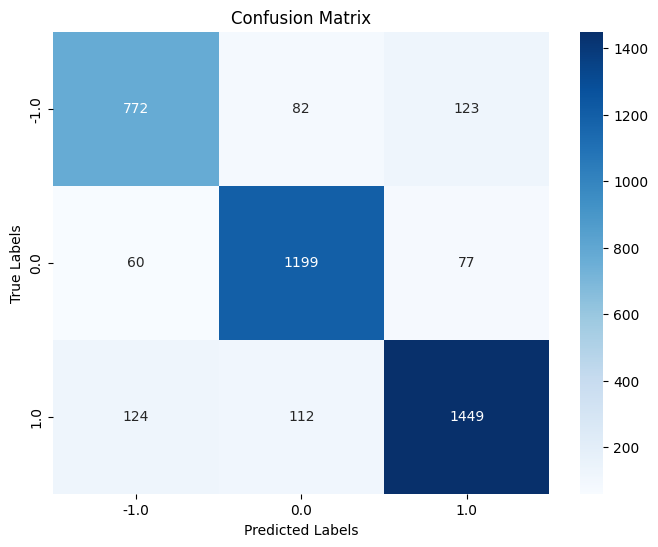

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Load preprocessed dataset
df = pd.read_csv('Twitter_Data (pp).csv')
df = df.head(20000)
df.dropna(subset=['cleaned_text(preprocessed)', 'category'], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

# Load your sentiment analysis dataset
sentences = df['cleaned_text(preprocessed)'].values
labels = df['category'].values

# Split the dataset into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize the input sentences
max_len = 128  # Maximum sequence length
train_input_ids = []
train_attention_masks = []

for sent in train_sentences:
    if isinstance(sent, str):
        encoded_dict = tokenizer.encode_plus(sent, add_special_tokens=True, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='pt')
        train_input_ids.append(encoded_dict['input_ids'])
        train_attention_masks.append(encoded_dict['attention_mask'])

train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)

# Define the batch size
batch_size = 32

# Create the DataLoader for training data
train_data = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.4f}')

# Save the trained model weights to Google Drive
model_weights_path = '/content/model_weights.pth'
torch.save(model.state_dict(), model_weights_path)

# Evaluate the model on the test set
model.eval()
test_input_ids = []
test_attention_masks = []

for sent in test_sentences:
    if isinstance(sent, str):
        encoded_dict = tokenizer.encode_plus(sent, add_special_tokens=True, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='pt')
        test_input_ids.append(encoded_dict['input_ids'])
        test_attention_masks.append(encoded_dict['attention_mask'])

test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_labels)

test_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

all_preds = []
all_labels = []

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2].to(device)

    with torch.no_grad():
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).cpu().numpy()
    all_preds.extend(preds)
    all_labels.extend(batch_labels.cpu().numpy())

print(classification_report(all_labels, all_preds))
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

